In [1]:
from pyfmi import load_fmu
from pyfmi.master import Master

In [9]:
# Load CSV reader FMU
csv_reader = load_fmu('csv_reader/simulator.fmu', log_level=7)
csv_reader.setup_experiment(start_time=0, stop_time=20)

In [10]:
# Create the Master algorithm
master = Master([csv_reader], [])
options = master.simulate_options()
options['step_size'] = 1.0

# Launch the simulation
results = master.simulate(options=options, final_time=23.0)
csv_reader.terminate()

c:\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Linear correction only supported if directional derivatives are available.
  import sys


Elapsed initialization time: 0.22881476164297965 seconds.
Master Algorithm options:
 Algorithm             :  Jacobi (fixed-step)
  Execution            : Serial
 Extrapolation Order   : 0
 Step-size             : 1.0
 Algebraic loop        : False
  Linear Correction    : False

Statistics: 
 Number of global steps        : 23

Simulation interval      : 0.0 - 23.0 seconds.
Elapsed simulation time  : 5.671113758081447 seconds.
 0.654527 seconds spent in simulator.
 5.009469 seconds spent saving simulation result.


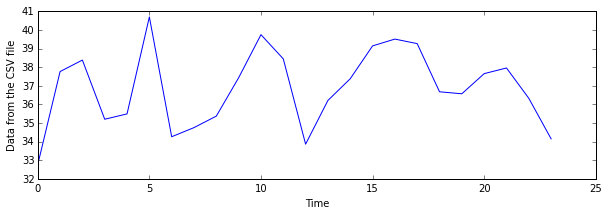

In [11]:
# Plot the results
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 3))
plt.plot(results[csv_reader]["time"], results[csv_reader]["y"])
plt.ylabel("Data from the CSV file")
plt.xlabel("Time")
plt.show()